In [1]:
import pandas as pd    # a wonderful dataframe to work with
import numpy as np     # adding a number of mathematical and science functions
import seaborn as sns  # a very easy to use statistical data visualization package
import matplotlib.pyplot as plt # a required plotting tool
import warnings
# sklearn is a big source of pre-written and mostly optimized ML algorithms.
# Here we use their Decision trees, Support Vector Machines, and the classic Perceptron. 
from sklearn import preprocessing, svm   
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
#ignore warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv('..\Downloads\stu_performance.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
# Translate GradeID from categorical to numerical
gradeID_dict = {"G-01" : 1,
                "G-02" : 2,
                "G-03" : 3,
                "G-04" : 4,
                "G-05" : 5,
                "G-06" : 6,
                "G-07" : 7,
                "G-08" : 8,
                "G-09" : 9,
                "G-10" : 10,
                "G-11" : 11,
                "G-12" : 12}

data = data.replace({"GradeID" : gradeID_dict})

class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
data = data.replace({"Class" : class_dict})

# Scale numerical fields
data["GradeID"] = preprocessing.scale(data["GradeID"])
data["raisedhands"] = preprocessing.scale(data["raisedhands"])
data["VisITedResources"] = preprocessing.scale(data["VisITedResources"])
data["AnnouncementsView"] = preprocessing.scale(data["AnnouncementsView"])
data["Discussion"] = preprocessing.scale(data["Discussion"])

# Use dummy variables for categorical fields
data = pd.get_dummies(data, columns=["gender",
                                     "NationalITy",
                                     "PlaceofBirth",
                                     "SectionID",
                                     "StageID",
                                     "Topic",
                                     "Semester",
                                     "Relation",
                                     "ParentAnsweringSurvey",
                                     "ParentschoolSatisfaction",
                                     "StudentAbsenceDays"])

# Show preprocessed data
data.head()


,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-0.563838,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
1,-0.563838,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,-0.563838,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,-0.563838,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,-0.563838,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


 The first few lines define a dictionary gradeID_dict that maps string values of grade levels to their corresponding numerical values, and then applies this mapping to the "GradeID" column of the dataset using the replace() method.

Next, a similar dictionary class_dict is defined to map string values of class levels to their corresponding numerical values, and this mapping is applied to the "Class" column of the dataset.

The next set of lines scale the numerical features of the dataset using the preprocessing.scale() method from scikit-learn's preprocessing module. The features that are being scaled are "GradeID", "raisedhands", "VisITedResources", "AnnouncementsView", and "Discussion".

The next set of lines creates dummy variables for the categorical features of the dataset using the pd.get_dummies() method from pandas. This creates new columns for each unique value of each categorical feature, where the value is 1 if the original value was present for that observation and 0 otherwise.

Finally, the preprocessed dataset is displayed using the head() method from pandas. This shows the first few rows of the preprocessed dataset with all the transformations applied.

In [8]:
corr = data.corr()
corr.iloc[[5]]

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
Class,0.071654,0.646298,0.677094,0.52737,0.308183,1.0,0.26349,-0.26349,-0.02631,-0.054841,...,-0.126239,0.126239,-0.401142,0.401142,-0.435495,0.435495,-0.375901,0.375901,-0.671312,0.671312


The code is calculating the correlation matrix for a dataset data using the corr() method from pandas. The resulting matrix corr contains pairwise correlations between all pairs of features in the dataset.

The second line of code is then selecting a specific row from the correlation matrix using the iloc method from pandas. In this case, it is selecting the row with index 5 (i.e., the 6th row), which represents the correlations of the feature at index 5 with all other features in the dataset.

The resulting output would be a pandas DataFrame that shows the correlations of the 6th feature with all other features in the dataset.

In [17]:
tree3 = DecisionTreeClassifier(random_state=56, criterion='gini', max_depth=3)
tree5 = DecisionTreeClassifier(random_state=56, criterion='gini', max_depth=5)

The first instance is assigned to the variable tree3 and is configured to use the Gini impurity measure as the criterion to evaluate feature splits, set the maximum depth of the tree to 3, and use a fixed random state of 56. The max_depth parameter limits the depth of the decision tree, which can help prevent overfitting and improve model generalization.

The second instance is assigned to the variable tree5 and is configured similarly to tree3, but with a larger max_depth value of 5. This would allow for more complex decision boundaries to be learned, but could also increase the risk of overfitting if the data is not sufficient to support such complexity.

Both tree3 and tree5 objects can then be fit to training data using the fit() method, and used to predict on new data using the predict() method.

In [11]:
results_3 = []
results_5 = []
predMiss_3 = []
predMiss_5 = []


for _ in range(1000):
    # Randomly sample our training data
    data_train = data.sample(frac=0.7)
    # train data without label
    data_train_X = data_train.loc[:, lambda x: [l for l in data if l != "Class"]]
    # labels of train data 
    data_train_Y = data_train.loc[:, lambda x: "Class"]

    # The rest is test data
    data_test = data.loc[~data.index.isin(data_train.index)]
    # Test data without label
    data_test_X = data_test.loc[:, lambda x: [l for l in data if l != "Class"]]
    # labels of test data 
    data_test_Y = data_test.loc[:, lambda x: "Class"]

    # Train svm
    tree3.fit(data_train_X, data_train_Y)
    tree5.fit(data_train_X, data_train_Y)
    #Sum the prediction misses. Since this is a smaller dataset,
    predMiss_3.append((data_test_Y != tree3.predict(data_test_X)).sum())
    predMiss_5.append((data_test_Y != tree5.predict(data_test_X)).sum())
    # Score the mean accuracy on the test data and append results in a list
    results_3.append(tree3.score(data_test_X, data_test_Y))
    results_5.append(tree5.score(data_test_X, data_test_Y))

# Convert results to an array and look at the minimum and the average
predErr_3 = np.hstack(predMiss_3)
predErr_5 = np.hstack(predMiss_5)
Final_3 = np.hstack(results_3)
Final_5 = np.hstack(results_5)
print('3-depth Tree Minimum Accuracy Score:   %.8f' % Final_3[Final_3.argmin()])
print('3-depth Tree Maximum Accuracy Score:   %.8f' % Final_3[Final_3.argmax()])
print('3-depth Tree Average Accuracy Score:   %.8f' % np.average(Final_3))
print('------------------------------------------------')
print('5-depth Tree Minimum Accuracy Score:   %.8f' % Final_5[Final_5.argmin()])
print('5-depth Tree Maximum Accuracy Score:   %.8f' % Final_5[Final_5.argmax()])
print('5-depth Tree Average Accuracy Score:   %.8f' % np.average(Final_5))


3-depth Tree Minimum Accuracy Score:   0.52083333
3-depth Tree Maximum Accuracy Score:   0.80555556
3-depth Tree Average Accuracy Score:   0.67809722
------------------------------------------------
5-depth Tree Minimum Accuracy Score:   0.57638889
5-depth Tree Maximum Accuracy Score:   0.82638889
5-depth Tree Average Accuracy Score:   0.71449306


Initialize four empty lists: results_3, results_5, predMiss_3, and predMiss_5.
For each of the 1000 iterations:
a. Randomly sample 70% of the data to use as training data, and use the remaining 30% as test data.
b. Separate the training data into two parts: data_train_X (features) and data_train_Y (labels).
c. Separate the test data into two parts: data_test_X (features) and data_test_Y (labels).
d. Train two decision tree classifiers: tree3 with a maximum depth of 3, and tree5 with a maximum depth of 5, using the training data.
e. Calculate the number of prediction misses (i.e., the number of misclassified instances) for each tree on the test data, and append these to predMiss_3 and predMiss_5, respectively.
f. Calculate the accuracy score for each tree on the test data, and append these to results_3 and results_5, respectively.
Convert results_3 and results_5 to arrays, and calculate the minimum, maximum, and average accuracy scores for each tree.
Print the results for each tree.
Note that data is assumed to be a pandas DataFrame containing both features and labels, where the label column is named "Class".

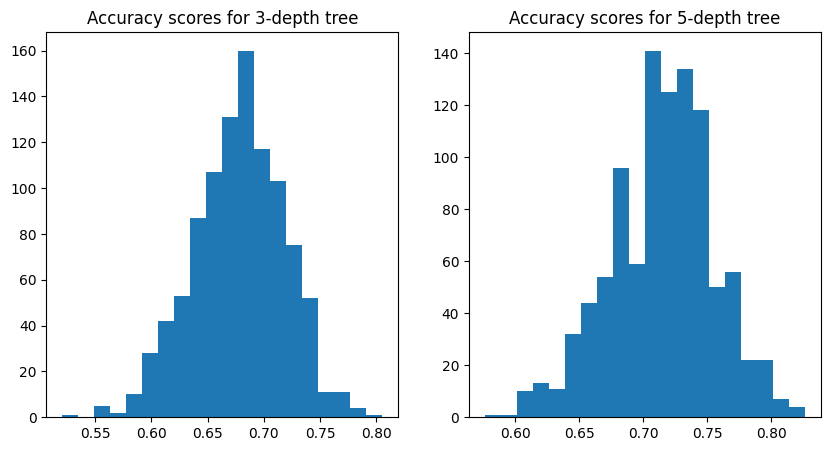

In [12]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram of accuracy scores for 3-depth tree
axs[0].hist(Final_3, bins=20)
axs[0].set_title('Accuracy scores for 3-depth tree')

# Plot histogram of accuracy scores for 5-depth tree
axs[1].hist(Final_5, bins=20)
axs[1].set_title('Accuracy scores for 5-depth tree')

# Show the plot
plt.show()


Import the matplotlib.pyplot library as plt.
Create a figure with two subplots using the subplots() function, specifying the number of rows and columns of subplots (1 row, 2 columns), and the size of the figure (figsize=(10, 5)).
Plot a histogram of the accuracy scores for the 3-depth tree using the hist() function, passing in the array Final_3 containing the accuracy scores, and specifying the number of bins in the histogram (bins=20).
Set the title of the first subplot using the set_title() function.
Plot a histogram of the accuracy scores for the 5-depth tree using the hist() function, passing in the array Final_5 containing the accuracy scores, and specifying the number of bins in the histogram (bins=20).
Set the title of the second subplot using the set_title() function.
Show the plot using the show() function.

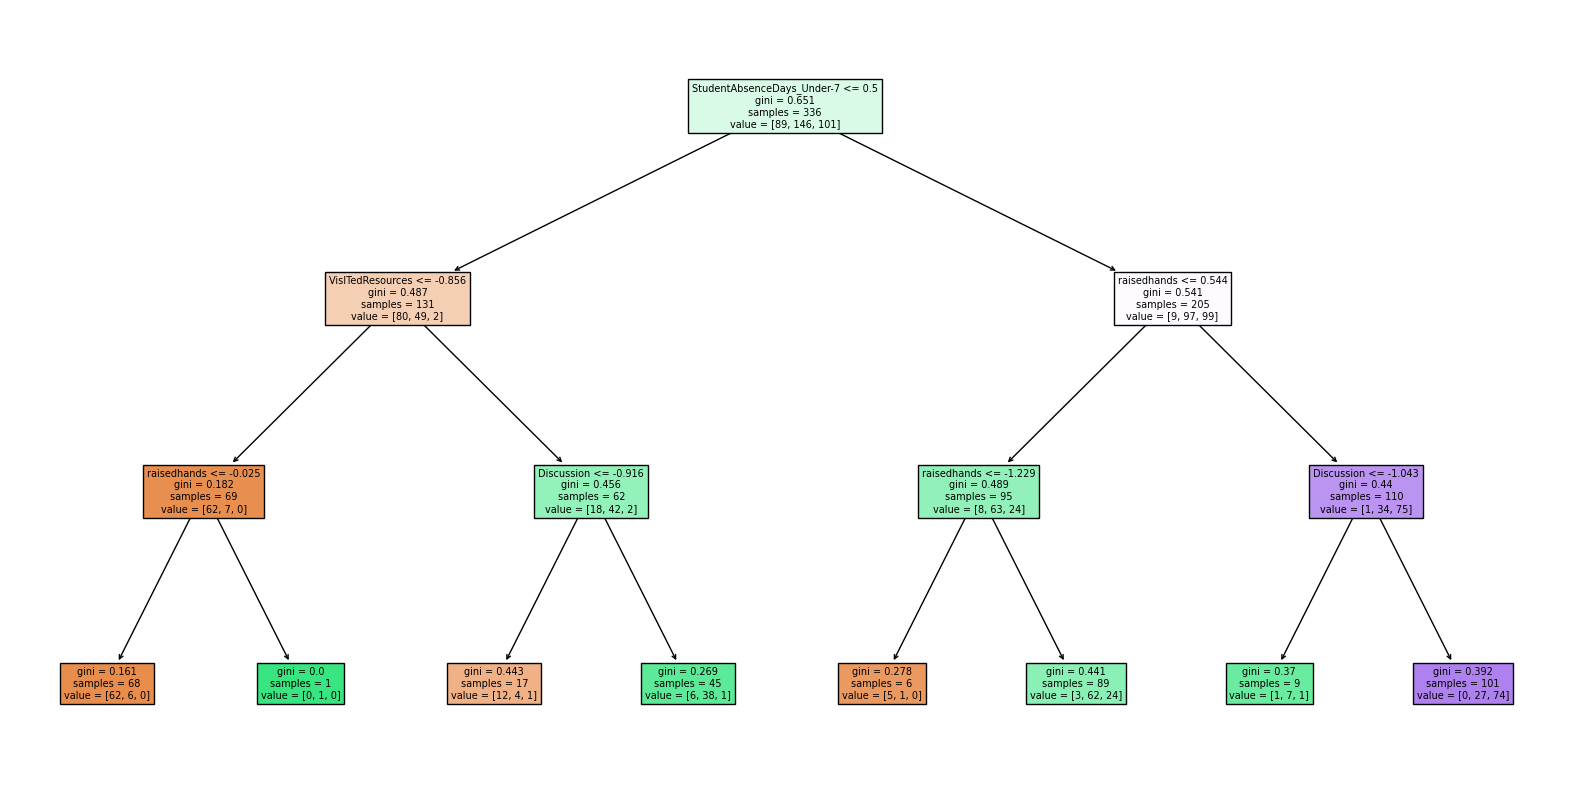

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree3, feature_names=data_train_X.columns, filled=True)
plt.show()


Import the matplotlib.pyplot library as plt and the plot_tree() function from the sklearn.tree module.
Create a new figure with a specific size using the figure() function from the pyplot module, passing in the desired size (figsize=(20, 10)).
Call the plot_tree() function passing in the 3-depth decision tree tree3 as the first argument and the list of feature names of the training data (data_train_X.columns) as the second argument. Additionally, the filled parameter is set to True to fill the decision nodes with colors depending on the majority class.
Show the plot using the show() function from the pyplot module (plt.show()). The decision tree will be displayed in the plot.

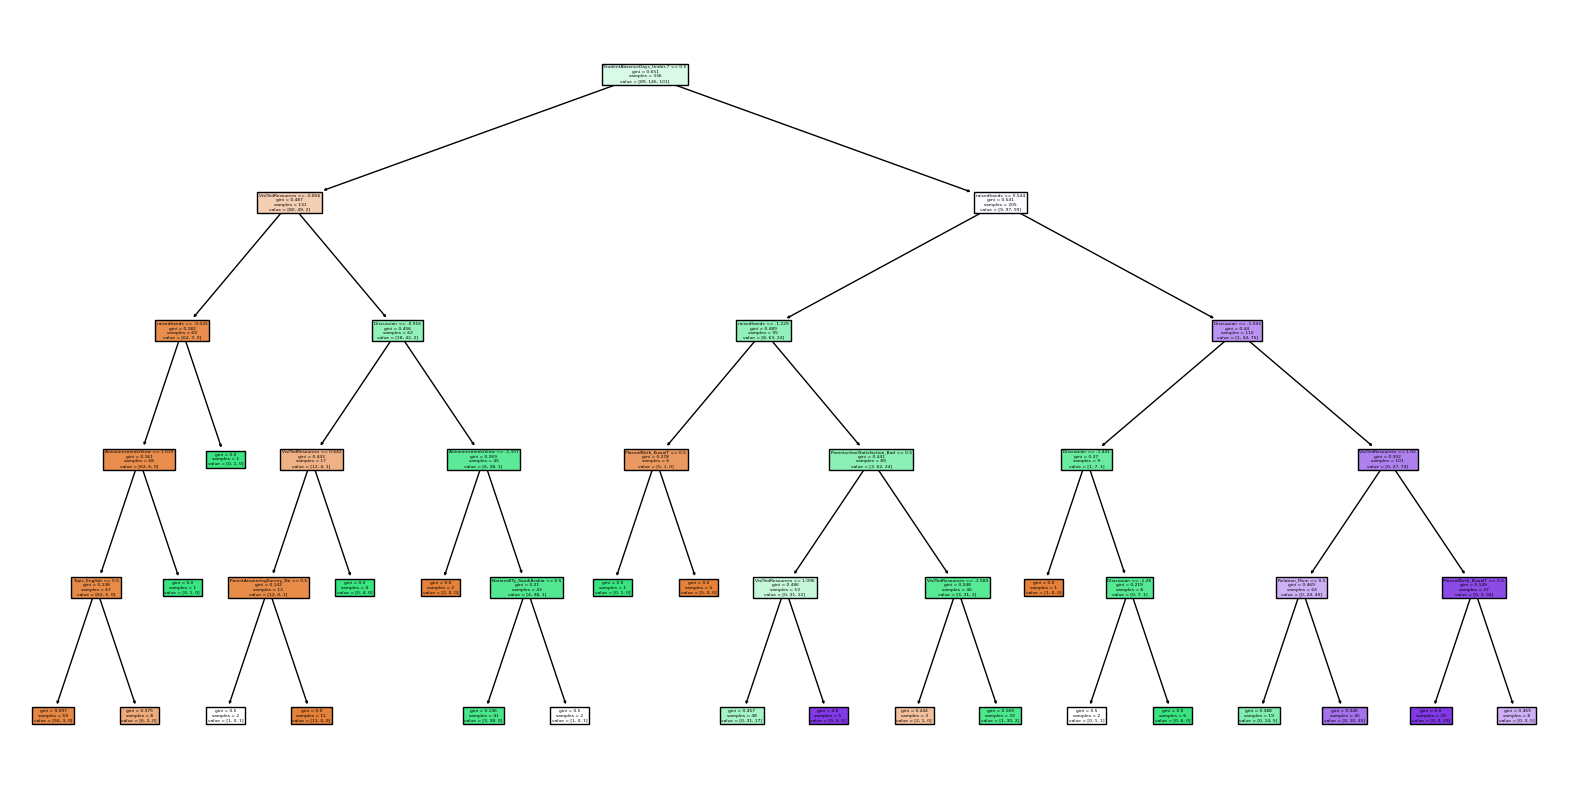

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree5, feature_names=data_train_X.columns, filled=True)
plt.show()



Import the matplotlib.pyplot library as plt and the plot_tree() function from the sklearn.tree module.
Create a new figure with a specific size using the figure() function from the pyplot module, passing in the desired size (figsize=(20, 10)).
Call the plot_tree() function passing in the 5-depth decision tree tree5 as the first argument and the list of feature names of the training data (data_train_X.columns) as the second argument. Additionally, the filled parameter is set to True to fill the decision nodes with colors depending on the majority class.
Show the plot using the show() function from the pyplot module (plt.show()). The decision tree will be displayed in the plot.